# Purpose

Process used car price data of UK
* merge data
* change categorical data to numerical type
* handle missing values
* utilized Scaler 
* PCA extraction
* correlation analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.decomposition import PCA

## 1. Merge Data

In [2]:
cars = pd.read_csv('~/data/cars.csv')
brand = pd.read_csv('~/data/brand.csv')

In [3]:
cars.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA FABIA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL CORSA,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI I30,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI HATCH,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL CORSA,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [4]:
brand.head()

,title,country
0,skoda,Czech Republic
1,vauxhall,United Kingdom
2,hyundai,South Korea
3,mini,United Kingdom
4,ford,United States


### 💡 [cars], [brand] has the common column of 'title'. But one is upper and one is lower case. Let's unite these and merge two tables based on 'title' column.

In [5]:
cars['title'].unique()

array(['SKODA FABIA', 'VAUXHALL CORSA', 'HYUNDAI I30', 'MINI HATCH',
       'HYUNDAI COUPE', 'FORD FOCUS', 'VOLVO 740', 'PEUGEOT 207',
       'FORD FIESTA', 'VAUXHALL INSIGNIA', 'BMW 3 SERIES', 'CITROEN C1',
       'CITROEN C4', 'VAUXHALL ASTRA', 'FORD MONDEO',
       'MERCEDES-BENZ A180', 'PEUGEOT 407', 'FORD KA',
       'MERCEDES-BENZ A CLASS', 'MAZDA MAZDA2', 'SAAB 9-3',
       'VOLKSWAGEN POLO', 'BMW 1 SERIES', 'HONDA ACCORD',
       'VOLKSWAGEN BEETLE', 'MG MG6', 'FORD C-MAX', 'HONDA CIVIC',
       'TOYOTA AURIS', 'VOLVO S40', 'SEAT IBIZA', 'PEUGEOT 308',
       'VAUXHALL MERIVA', 'MERCEDES-BENZ B CLASS', 'MAZDA MAZDA3',
       'NISSAN 350 Z', 'ALFA ROMEO MITO', 'RENAULT FLUENCE',
       'VOLKSWAGEN PASSAT', 'KIA SPORTAGE', 'CITROEN XM',
       'VAUXHALL ANTARA', 'NISSAN NOTE', 'BMW 5 SERIES', 'HONDA CR-V',
       'PROTON SAVVY', 'NISSAN MICRA', 'FIAT PANDA', 'RENAULT MEGANE',
       'RENAULT CLIO', 'HYUNDAI I20', 'CITROEN C3', 'AUDI A6 SALOON',
       'TOYOTA YARIS', 'FIAT 500', 

In [6]:
brand['title'].unique()

array(['skoda', 'vauxhall', 'hyundai', 'mini', 'ford', 'volvo', 'peugeot',
       'bmw', 'citroen', 'mercedes-benz', 'mazda', 'saab', 'volkswagen',
       'honda', 'mg', 'toyota', 'seat', 'nissan', 'alfa', 'renault',
       'kia', 'proton', 'fiat', 'audi', 'mitsubishi', 'lexus', 'land',
       'chevrolet', 'suzuki', 'dacia', 'daihatsu', 'jeep', 'jaguar',
       'chrysler', 'rover', 'ds', 'daewoo', 'dodge', 'porsche', 'subaru',
       'infiniti', 'abarth', 'smart', 'marcos', 'maserati', 'ssangyong',
       'lagonda', 'isuzu'], dtype=object)

### 💡 Extract first brand name from [cars] table, and make [brand] titles upper case letter 

In [7]:
#extract brand from cars title
cars['title'].str.split(expand=True)[0]

0          SKODA
1       VAUXHALL
2        HYUNDAI
3           MINI
4       VAUXHALL
          ...   
3682     RENAULT
3683        AUDI
3684         BMW
3685       HONDA
3686    VAUXHALL
Name: 0, Length: 3687, dtype: object

In [8]:
cars['title'] = cars['title'].str.split(expand=True)[0]

In [9]:
#make upper case letter of brand table's title
brand['title'].str.upper()

0             SKODA
1          VAUXHALL
2           HYUNDAI
3              MINI
4              FORD
5             VOLVO
6           PEUGEOT
7               BMW
8           CITROEN
9     MERCEDES-BENZ
10            MAZDA
11             SAAB
12       VOLKSWAGEN
13            HONDA
14               MG
15           TOYOTA
16             SEAT
17           NISSAN
18             ALFA
19          RENAULT
20              KIA
21           PROTON
22             FIAT
23             AUDI
24       MITSUBISHI
25            LEXUS
26             LAND
27        CHEVROLET
28           SUZUKI
29            DACIA
30         DAIHATSU
31             JEEP
32           JAGUAR
33         CHRYSLER
34            ROVER
35               DS
36           DAEWOO
37            DODGE
38          PORSCHE
39           SUBARU
40         INFINITI
41           ABARTH
42            SMART
43           MARCOS
44         MASERATI
45        SSANGYONG
46          LAGONDA
47            ISUZU
Name: title, dtype: object

In [10]:
brand['title'] = brand['title'].str.upper()

In [11]:
cars.head()

,title,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,VAUXHALL,1495,88585,2008,4.0,Petrol,Hatchback,1.2L,Manual,3.0,5.0,Euro 4,Full
2,HYUNDAI,949,137000,2011,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 5,NaN
3,MINI,2395,96731,2010,5.0,Petrol,Hatchback,1.4L,Manual,3.0,4.0,Euro 4,Full
4,VAUXHALL,1000,85000,2013,NaN,Diesel,Hatchback,1.3L,Manual,5.0,5.0,Euro 5,NaN


In [12]:
brand.head()

,title,country
0,SKODA,Czech Republic
1,VAUXHALL,United Kingdom
2,HYUNDAI,South Korea
3,MINI,United Kingdom
4,FORD,United States


### 💡 Now Let's Merge

In [13]:
cars_df = brand.merge(cars, on='title', how='left')

In [14]:
cars_df.head()

,title,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA,Czech Republic,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,SKODA,Czech Republic,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
2,SKODA,Czech Republic,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full
3,SKODA,Czech Republic,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN
4,SKODA,Czech Republic,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN


## 2. Categorical -> Numerical

### 💡Seems like categorical datasets are as follows ;
'Engine', 'Emission Class', 

In [15]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   country            3687 non-null   object 
 2   Price              3687 non-null   int64  
 3   Mileage(miles)     3687 non-null   int64  
 4   Registration_Year  3687 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3687 non-null   object 
 7   Body type          3687 non-null   object 
 8   Engine             3642 non-null   object 
 9   Gearbox            3687 non-null   object 
 10  Doors              3662 non-null   float64
 11  Seats              3652 non-null   float64
 12  Emission Class     3600 non-null   object 
 13  Service history    540 non-null    object 
dtypes: float64(3), int64(3), object(8)
memory usage: 432.1+ KB


In [16]:
cars_df['Service history'].unique()

array([nan, 'Full'], dtype=object)

### 💡Let's change Engine into numerical (remove L)

In [17]:
cars_df['Engine'] = cars_df['Engine'].str.replace('L','')

In [18]:
cars_df['Engine'] = pd.to_numeric(cars_df['Engine'])

In [19]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   country            3687 non-null   object 
 2   Price              3687 non-null   int64  
 3   Mileage(miles)     3687 non-null   int64  
 4   Registration_Year  3687 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3687 non-null   object 
 7   Body type          3687 non-null   object 
 8   Engine             3642 non-null   float64
 9   Gearbox            3687 non-null   object 
 10  Doors              3662 non-null   float64
 11  Seats              3652 non-null   float64
 12  Emission Class     3600 non-null   object 
 13  Service history    540 non-null    object 
dtypes: float64(4), int64(3), object(7)
memory usage: 432.1+ KB


### 💡Let's change Emission class into numeric 

In [20]:
cars_df['Emission Class'].value_counts()

Euro 5    1257
Euro 6    1109
Euro 4    1068
Euro 3     137
Euro 2      25
Euro 1       4
Name: Emission Class, dtype: int64

In [21]:
cars_df['Emission Class'] = cars_df['Emission Class'].str.split(expand=True)[1]

In [22]:
cars_df['Emission Class'] = pd.to_numeric(cars_df['Emission Class'])

In [23]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3687 entries, 0 to 3686
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              3687 non-null   object 
 1   country            3687 non-null   object 
 2   Price              3687 non-null   int64  
 3   Mileage(miles)     3687 non-null   int64  
 4   Registration_Year  3687 non-null   int64  
 5   Previous Owners    2276 non-null   float64
 6   Fuel type          3687 non-null   object 
 7   Body type          3687 non-null   object 
 8   Engine             3642 non-null   float64
 9   Gearbox            3687 non-null   object 
 10  Doors              3662 non-null   float64
 11  Seats              3652 non-null   float64
 12  Emission Class     3600 non-null   float64
 13  Service history    540 non-null    object 
dtypes: float64(5), int64(3), object(6)
memory usage: 432.1+ KB


In [24]:
cars_df

,title,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA,Czech Republic,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN
1,SKODA,Czech Republic,6900,70189,2016,3.0,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN
2,SKODA,Czech Republic,1990,150000,2007,2.0,Diesel,Hatchback,1.9,Manual,5.0,5.0,4.0,Full
3,SKODA,Czech Republic,1995,84000,2008,NaN,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,NaN
4,SKODA,Czech Republic,2495,124138,2011,3.0,Petrol,Hatchback,1.2,Automatic,5.0,5.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MASERATI,Italy,10000,72000,2009,3.0,Petrol,Saloon,4.2,Automatic,4.0,5.0,4.0,Full
3683,SSANGYONG,South Korea,12995,42771,2018,2.0,Diesel,SUV,2.2,Automatic,5.0,5.0,6.0,NaN
3684,SSANGYONG,South Korea,4277,82400,2013,NaN,Diesel,SUV,2.0,Automatic,5.0,5.0,5.0,Full
3685,LAGONDA,United Kingdom,14995,84000,1953,NaN,Petrol,Saloon,2.6,Manual,4.0,NaN,NaN,NaN


## 3. Missing Values

In [25]:
cars_df.isna().sum()

title                   0
country                 0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
dtype: int64

### 💡 So many missing values in Previous Owners and Service history among total 3,687 data. Let's remove Previous Owners, and fill 'Unknown' in Service history column.

In [26]:
cars_df = cars_df.drop(['Previous Owners'], axis=1)

In [27]:
cars_df

,title,country,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA,Czech Republic,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN
1,SKODA,Czech Republic,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,NaN
2,SKODA,Czech Republic,1990,150000,2007,Diesel,Hatchback,1.9,Manual,5.0,5.0,4.0,Full
3,SKODA,Czech Republic,1995,84000,2008,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,NaN
4,SKODA,Czech Republic,2495,124138,2011,Petrol,Hatchback,1.2,Automatic,5.0,5.0,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MASERATI,Italy,10000,72000,2009,Petrol,Saloon,4.2,Automatic,4.0,5.0,4.0,Full
3683,SSANGYONG,South Korea,12995,42771,2018,Diesel,SUV,2.2,Automatic,5.0,5.0,6.0,NaN
3684,SSANGYONG,South Korea,4277,82400,2013,Diesel,SUV,2.0,Automatic,5.0,5.0,5.0,Full
3685,LAGONDA,United Kingdom,14995,84000,1953,Petrol,Saloon,2.6,Manual,4.0,NaN,NaN,NaN


*  from 14 columns -> 12 columns (dropped 2 columns)

In [28]:
#fill blanks in 'service history' as 'unknown'
cars_df['Service history'] = cars_df['Service history'].fillna(value='Unknown')

In [29]:
cars_df

,title,country,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA,Czech Republic,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown
1,SKODA,Czech Republic,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown
2,SKODA,Czech Republic,1990,150000,2007,Diesel,Hatchback,1.9,Manual,5.0,5.0,4.0,Full
3,SKODA,Czech Republic,1995,84000,2008,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown
4,SKODA,Czech Republic,2495,124138,2011,Petrol,Hatchback,1.2,Automatic,5.0,5.0,5.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MASERATI,Italy,10000,72000,2009,Petrol,Saloon,4.2,Automatic,4.0,5.0,4.0,Full
3683,SSANGYONG,South Korea,12995,42771,2018,Diesel,SUV,2.2,Automatic,5.0,5.0,6.0,Unknown
3684,SSANGYONG,South Korea,4277,82400,2013,Diesel,SUV,2.0,Automatic,5.0,5.0,5.0,Full
3685,LAGONDA,United Kingdom,14995,84000,1953,Petrol,Saloon,2.6,Manual,4.0,NaN,NaN,Unknown


### 💡 Let's drop the columns with missing values

In [30]:
cars_df.isna().sum()

title                 0
country               0
Price                 0
Mileage(miles)        0
Registration_Year     0
Fuel type             0
Body type             0
Engine               45
Gearbox               0
Doors                25
Seats                35
Emission Class       87
Service history       0
dtype: int64

In [31]:
cars_df[cars_df['Emission Class'].isna()]

,title,country,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
160,VAUXHALL,United Kingdom,3950,56800,2015,Diesel,Hatchback,1.7,Manual,NaN,5.0,NaN,Unknown
471,VAUXHALL,United Kingdom,5995,76000,2014,Diesel,Coupe,NaN,Manual,NaN,NaN,NaN,Unknown
599,VAUXHALL,United Kingdom,13998,28045,2020,Electric,Hatchback,NaN,Automatic,5.0,5.0,NaN,Unknown
968,FORD,United States,1895,109000,2009,Petrol,Hatchback,NaN,Manual,5.0,5.0,NaN,Unknown
996,FORD,United States,2490,68837,2007,Petrol,Hatchback,NaN,Manual,NaN,NaN,NaN,Full
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3642,ROVER,United Kingdom,3975,34000,1995,Petrol,Saloon,2.7,Automatic,4.0,NaN,NaN,Unknown
3651,PORSCHE,Germany,6750,121000,1987,Petrol,Coupe,2.5,Manual,2.0,4.0,NaN,Unknown
3679,MARCOS,United Kingdom,11495,19000,1981,Petrol,Convertible,2.0,Manual,NaN,2.0,NaN,Unknown
3685,LAGONDA,United Kingdom,14995,84000,1953,Petrol,Saloon,2.6,Manual,4.0,NaN,NaN,Unknown


In [32]:
cars_df = cars_df.dropna()

In [33]:
cars_df.isna().sum()

title                0
country              0
Price                0
Mileage(miles)       0
Registration_Year    0
Fuel type            0
Body type            0
Engine               0
Gearbox              0
Doors                0
Seats                0
Emission Class       0
Service history      0
dtype: int64

In [34]:
cars_df['title'].nunique()

45

### 💡 Check if there's any odd values and remove

In [35]:
cars_df.describe()

,Price,Mileage(miles),Registration_Year,Engine,Doors,Seats,Emission Class
count,3593.000000,3.593000e+03,3593.000000,3593.000000,3593.000000,3593.000000,3593.000000
mean,5791.841637,8.151118e+04,2011.953799,1.603173,4.318675,4.898692,4.915113
std,4515.066997,3.954136e+04,4.741254,0.485475,0.986281,0.575368,0.901791
min,400.000000,1.000000e+00,1993.000000,0.800000,2.000000,2.000000,1.000000
25%,2490.000000,5.698400e+04,2008.000000,1.300000,3.000000,5.000000,4.000000
50%,3999.000000,8.000000e+04,2012.000000,1.600000,5.000000,5.000000,5.000000
75%,7999.000000,1.030990e+05,2016.000000,1.900000,5.000000,5.000000,6.000000
max,33900.000000,1.110100e+06,2023.000000,6.300000,5.000000,7.000000,6.000000


In [36]:
cars_df[cars_df['Registration_Year'] == 2025]

,title,country,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history


* max registration year= 2025 is impossible.

In [37]:
cars_df = cars_df[cars_df['Registration_Year'] != 2025]

In [38]:
cars_df

,title,country,Price,Mileage(miles),Registration_Year,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA,Czech Republic,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown
1,SKODA,Czech Republic,6900,70189,2016,Diesel,Hatchback,1.4,Manual,5.0,5.0,6.0,Unknown
2,SKODA,Czech Republic,1990,150000,2007,Diesel,Hatchback,1.9,Manual,5.0,5.0,4.0,Full
3,SKODA,Czech Republic,1995,84000,2008,Petrol,Hatchback,1.4,Manual,5.0,5.0,4.0,Unknown
4,SKODA,Czech Republic,2495,124138,2011,Petrol,Hatchback,1.2,Automatic,5.0,5.0,5.0,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,MASERATI,Italy,16000,66000,2008,Petrol,Coupe,4.2,Automatic,2.0,4.0,4.0,Full
3681,MASERATI,Italy,13900,63000,2014,Diesel,Saloon,3.0,Automatic,4.0,5.0,5.0,Unknown
3682,MASERATI,Italy,10000,72000,2009,Petrol,Saloon,4.2,Automatic,4.0,5.0,4.0,Full
3683,SSANGYONG,South Korea,12995,42771,2018,Diesel,SUV,2.2,Automatic,5.0,5.0,6.0,Unknown


# 4. Scaler 

### 💡 Let's do One Hot Encoding before scaling 

In [39]:
cars_df = pd.get_dummies(cars_df, columns=['title','country','Fuel type','Body type', 'Gearbox', 'Service history'], drop_first=True)

In [40]:
cars_df

,Price,Mileage(miles),Registration_Year,Engine,Doors,Seats,Emission Class,title_ALFA,title_AUDI,title_BMW,...,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown
0,6900,70189,2016,1.4,5.0,5.0,6.0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
1,6900,70189,2016,1.4,5.0,5.0,6.0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
2,1990,150000,2007,1.9,5.0,5.0,4.0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,1995,84000,2008,1.4,5.0,5.0,4.0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,2495,124138,2011,1.2,5.0,5.0,5.0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3680,16000,66000,2008,4.2,2.0,4.0,4.0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3681,13900,63000,2014,3.0,4.0,5.0,5.0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3682,10000,72000,2009,4.2,4.0,5.0,4.0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3683,12995,42771,2018,2.2,5.0,5.0,6.0,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [41]:
ss = StandardScaler()
rs = RobustScaler()
mm = MinMaxScaler()

## 1) Standard Scaler

In [42]:
ss.fit_transform(cars_df)

array([[ 0.2454698 , -0.2863775 ,  0.85352188, ..., -0.33059491,
         0.51318755,  0.41781198],
       [ 0.2454698 , -0.2863775 ,  0.85352188, ..., -0.33059491,
         0.51318755,  0.41781198],
       [-0.84215158,  1.73232175, -1.04497427, ..., -0.33059491,
         0.51318755, -2.39342107],
       ...,
       [ 0.9321554 , -0.24057098, -0.62308624, ...,  3.02485   ,
        -1.94860533, -2.39342107],
       [ 1.59558229, -0.97987459,  1.27540991, ..., -0.33059491,
        -1.94860533,  0.41781198],
       [-0.33555482,  0.02248138,  0.22068983, ..., -0.33059491,
        -1.94860533, -2.39342107]])

In [43]:
ss_df = pd.DataFrame(ss.transform(cars_df), columns=cars_df.columns)

In [44]:
ss_df

,Price,Mileage(miles),Registration_Year,Engine,Doors,Seats,Emission Class,title_ALFA,title_AUDI,title_BMW,...,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown
0,0.245470,-0.286378,0.853522,-0.418561,0.690898,0.176100,1.203204,-0.070957,-0.205069,-0.281608,...,-0.17265,-0.196059,-0.220782,0.784575,-0.20727,-0.028908,-0.382699,-0.330595,0.513188,0.417812
1,0.245470,-0.286378,0.853522,-0.418561,0.690898,0.176100,1.203204,-0.070957,-0.205069,-0.281608,...,-0.17265,-0.196059,-0.220782,0.784575,-0.20727,-0.028908,-0.382699,-0.330595,0.513188,0.417812
2,-0.842152,1.732322,-1.044974,0.611501,0.690898,0.176100,-1.014914,-0.070957,-0.205069,-0.281608,...,-0.17265,-0.196059,-0.220782,0.784575,-0.20727,-0.028908,-0.382699,-0.330595,0.513188,-2.393421
3,-0.841044,0.062951,-0.834030,-0.418561,0.690898,0.176100,-1.014914,-0.070957,-0.205069,-0.281608,...,-0.17265,-0.196059,-0.220782,0.784575,-0.20727,-0.028908,-0.382699,-0.330595,0.513188,0.417812
4,-0.730288,1.078181,-0.201198,-0.830587,0.690898,0.176100,0.094145,-0.070957,-0.205069,-0.281608,...,-0.17265,-0.196059,-0.220782,0.784575,-0.20727,-0.028908,-0.382699,-0.330595,-1.948605,0.417812
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,2.261224,-0.392332,-0.834030,5.349789,-2.351255,-1.562161,-1.014914,-0.070957,-0.205069,-0.281608,...,-0.17265,5.100494,-0.220782,-1.274576,-0.20727,-0.028908,-0.382699,-0.330595,-1.948605,-2.393421
3589,1.796050,-0.468212,0.431634,2.877639,-0.323153,0.176100,0.094145,-0.070957,-0.205069,-0.281608,...,-0.17265,-0.196059,-0.220782,-1.274576,-0.20727,-0.028908,-0.382699,3.024850,-1.948605,0.417812
3590,0.932155,-0.240571,-0.623086,5.349789,-0.323153,0.176100,-1.014914,-0.070957,-0.205069,-0.281608,...,-0.17265,-0.196059,-0.220782,-1.274576,-0.20727,-0.028908,-0.382699,3.024850,-1.948605,-2.393421
3591,1.595582,-0.979875,1.275410,1.229539,0.690898,0.176100,1.203204,-0.070957,-0.205069,-0.281608,...,-0.17265,-0.196059,-0.220782,-1.274576,-0.20727,-0.028908,2.613023,-0.330595,-1.948605,0.417812


## 2) Robust Scaler

In [45]:
rs.fit_transform(cars_df)

array([[ 0.52659285, -0.21275073,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.52659285, -0.21275073,  0.5       , ...,  0.        ,
         0.        ,  0.        ],
       [-0.36467598,  1.51794427, -0.625     , ...,  0.        ,
         0.        , -1.        ],
       ...,
       [ 1.0893084 , -0.17347935, -0.375     , ...,  1.        ,
        -1.        , -1.        ],
       [ 1.63296424, -0.80730782,  0.75      , ...,  0.        ,
        -1.        ,  0.        ],
       [ 0.05046288,  0.0520438 ,  0.125     , ...,  0.        ,
        -1.        , -1.        ]])

In [46]:
rs_df = pd.DataFrame(rs.transform(cars_df), columns=cars_df.columns)

In [47]:
rs_df

,Price,Mileage(miles),Registration_Year,Engine,Doors,Seats,Emission Class,title_ALFA,title_AUDI,title_BMW,...,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown
0,0.526593,-0.212751,0.500,-0.333333,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.526593,-0.212751,0.500,-0.333333,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-0.364676,1.517944,-0.625,0.500000,0.0,0.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0
3,-0.363768,0.086740,-0.500,-0.333333,0.0,0.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-0.273008,0.957129,-0.125,-0.666667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,2.178435,-0.303589,-0.500,4.333333,-1.5,-1.0,-0.5,0.0,0.0,0.0,...,0.0,1.0,0.0,-1.0,0.0,0.0,0.0,0.0,-1.0,-1.0
3589,1.797241,-0.368644,0.250,2.333333,-0.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,-1.0,0.0
3590,1.089308,-0.173479,-0.375,4.333333,-0.5,0.0,-0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,0.0,1.0,-1.0,-1.0
3591,1.632964,-0.807308,0.750,1.000000,0.0,0.0,0.5,0.0,0.0,0.0,...,0.0,0.0,0.0,-1.0,0.0,0.0,1.0,0.0,-1.0,0.0


## 3) MinMax Scaler

In [48]:
mm.fit_transform(cars_df)

array([[0.19402985, 0.06322679, 0.76666667, ..., 0.        , 1.        ,
        1.        ],
       [0.19402985, 0.06322679, 0.76666667, ..., 0.        , 1.        ,
        1.        ],
       [0.04746269, 0.13512218, 0.46666667, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.28656716, 0.06485818, 0.53333333, ..., 1.        , 0.        ,
        0.        ],
       [0.37597015, 0.0385281 , 0.83333333, ..., 0.        , 0.        ,
        1.        ],
       [0.11573134, 0.07422671, 0.66666667, ..., 0.        , 0.        ,
        0.        ]])

In [49]:
mm_df = pd.DataFrame(mm.transform(cars_df), columns= cars_df.columns)

In [50]:
mm_df

,Price,Mileage(miles),Registration_Year,Engine,Doors,Seats,Emission Class,title_ALFA,title_AUDI,title_BMW,...,Body type_Convertible,Body type_Coupe,Body type_Estate,Body type_Hatchback,Body type_MPV,Body type_Pickup,Body type_SUV,Body type_Saloon,Gearbox_Manual,Service history_Unknown
0,0.194030,0.063227,0.766667,0.109091,1.000000,0.6,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
1,0.194030,0.063227,0.766667,0.109091,1.000000,0.6,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
2,0.047463,0.135122,0.466667,0.200000,1.000000,0.6,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.047612,0.075668,0.500000,0.109091,1.000000,0.6,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,0.062537,0.111825,0.600000,0.072727,1.000000,0.6,0.8,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3588,0.465672,0.059453,0.500000,0.618182,0.000000,0.4,0.6,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3589,0.402985,0.056751,0.700000,0.400000,0.666667,0.6,0.8,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
3590,0.286567,0.064858,0.533333,0.618182,0.666667,0.6,0.6,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3591,0.375970,0.038528,0.833333,0.254545,1.000000,0.6,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## 5. PCA 

In [76]:
from sklearn.decomposition import PCA
pca = PCA(2)

In [77]:
pca.fit(cars_df)

PCA(n_components=2)

In [78]:
pd.DataFrame(pca.transform(cars_df))

,0,1
0,-11367.375497,450.043514
1,-11367.375497,450.043514
2,68594.039218,174.288099
3,2704.708755,-3646.203678
4,42746.247528,-820.567959
...,...,...
3588,-16076.785367,9291.932731
3589,-18950.022193,7021.583231
3590,-9739.101504,3649.794033
3591,-39092.557885,4945.597452


In [79]:
(pca.explained_variance_ratio_).sum()

0.9999999916843322

In [80]:
pca = PCA(3)

In [81]:
pca.fit(cars_df)

PCA(n_components=3)

In [82]:
(pca.explained_variance_ratio_).sum()

0.9999999973558916

# Extra) Analysis (Correlation, Brands by Country)

## 1) Correlation

In [83]:
cars_df2 = brand.merge(cars, on='title', how='left')

In [88]:
cars_df2.corr()

,Price,Mileage(miles),Registration_Year,Previous Owners,Doors,Seats
Price,1.000000,-0.500358,0.722971,-0.479424,0.113335,-0.027393
Mileage(miles),-0.500358,1.000000,-0.410781,0.316160,-0.037024,0.095271
Registration_Year,0.722971,-0.410781,1.000000,-0.501045,0.219365,0.037166
Previous Owners,-0.479424,0.316160,-0.501045,1.000000,-0.153262,-0.029338
Doors,0.113335,-0.037024,0.219365,-0.153262,1.000000,0.497160
Seats,-0.027393,0.095271,0.037166,-0.029338,0.497160,1.000000


<AxesSubplot:>

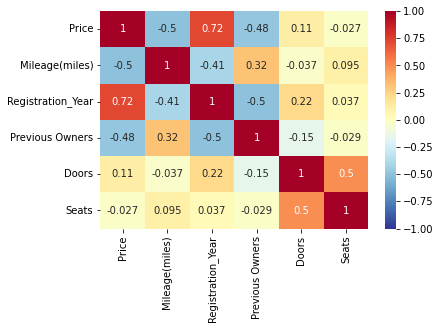

In [99]:
df = cars_df2.corr()
sns.heatmap(df, annot=True, cmap='RdYlBu_r', vmin=-1, vmax=1)

### 💡 Price & Registration_Year has the highest correlation,  next is Doors & Seats

In [93]:
cars_df2.isna().sum()

title                   0
country                 0
Price                   0
Mileage(miles)          0
Registration_Year       0
Previous Owners      1411
Fuel type               0
Body type               0
Engine                 45
Gearbox                 0
Doors                  25
Seats                  35
Emission Class         87
Service history      3147
dtype: int64

In [95]:
cars_df2

,title,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA,Czech Republic,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,SKODA,Czech Republic,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
2,SKODA,Czech Republic,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full
3,SKODA,Czech Republic,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN
4,SKODA,Czech Republic,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MASERATI,Italy,10000,72000,2009,3.0,Petrol,Saloon,4.2L,Automatic,4.0,5.0,Euro 4,Full
3683,SSANGYONG,South Korea,12995,42771,2018,2.0,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,NaN
3684,SSANGYONG,South Korea,4277,82400,2013,NaN,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 5,Full
3685,LAGONDA,United Kingdom,14995,84000,1953,NaN,Petrol,Saloon,2.6L,Manual,4.0,NaN,NaN,NaN


In [100]:
cars_df2.dropna(axis=1, thresh=2)

,title,country,Price,Mileage(miles),Registration_Year,Previous Owners,Fuel type,Body type,Engine,Gearbox,Doors,Seats,Emission Class,Service history
0,SKODA,Czech Republic,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
1,SKODA,Czech Republic,6900,70189,2016,3.0,Diesel,Hatchback,1.4L,Manual,5.0,5.0,Euro 6,NaN
2,SKODA,Czech Republic,1990,150000,2007,2.0,Diesel,Hatchback,1.9L,Manual,5.0,5.0,Euro 4,Full
3,SKODA,Czech Republic,1995,84000,2008,NaN,Petrol,Hatchback,1.4L,Manual,5.0,5.0,Euro 4,NaN
4,SKODA,Czech Republic,2495,124138,2011,3.0,Petrol,Hatchback,1.2L,Automatic,5.0,5.0,Euro 5,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3682,MASERATI,Italy,10000,72000,2009,3.0,Petrol,Saloon,4.2L,Automatic,4.0,5.0,Euro 4,Full
3683,SSANGYONG,South Korea,12995,42771,2018,2.0,Diesel,SUV,2.2L,Automatic,5.0,5.0,Euro 6,NaN
3684,SSANGYONG,South Korea,4277,82400,2013,NaN,Diesel,SUV,2.0L,Automatic,5.0,5.0,Euro 5,Full
3685,LAGONDA,United Kingdom,14995,84000,1953,NaN,Petrol,Saloon,2.6L,Manual,4.0,NaN,NaN,NaN


## 2) Brands By Country

In [110]:
brand_country = pd.DataFrame(cars_df2.groupby('country')['title'].nunique())

In [117]:
brand_country['brands'] = cars_df2.groupby('country')['title'].unique()

In [118]:
brand_country

,title,brands
country,,
Czech Republic,1,[SKODA]
France,4,"[PEUGEOT, CITROEN, RENAULT, DS]"
Germany,6,"[BMW, MERCEDES-BENZ, VOLKSWAGEN, AUDI, PORSCHE..."
Italy,4,"[ALFA, FIAT, ABARTH, MASERATI]"
Japan,11,"[MAZDA, HONDA, TOYOTA, NISSAN, MITSUBISHI, LEX..."
Malaysia,1,[PROTON]
Romania,1,[DACIA]
South Korea,4,"[HYUNDAI, KIA, DAEWOO, SSANGYONG]"
Spain,1,[SEAT]


## 💡회고

* 잘한 점 : 데이터를 다양한 방식으로 transform 하는 방법을 적용하는게 재미있다. 모델링과 스케일링을 편하게 하기 위해 데이터를 수치형으로 바꿔주는 방식이나, 어떤 feature를 위주로 분석할지 고민해보는 과정이 의미있었다. visualization은 하고나면 확실히 뿌듯하고 기분이 좋다. 내가 한 작업을 시각적으로 보기가 좋아서 그런 것 같다. 이제 missing value, duplicated data 다루는 부분은 많이 익숙해졌다. 그리고 string 형태의 데이터를 따로 뽑아내는 방법도 익숙해졌다.  
  
* 아쉬운 점 : 나는 drop을 그냥 빈값이 있는 모든 행을 drop 하는 식으로 사용했는데, 더 꼼꼼히 하나씩 검토하면서 어떤 값을 거르고 어떤 값을 남길지 보는 눈이 필요할 것 같다.

  
* 개선할 점 : 특정 갯수 이상 비어있을 경우 drop하는 thresh 명령어 사용법을 더 잘 익혀야겠다. 
  
